In [57]:
# Using miceforest library
import pandas as pd
import numpy as np
import miceforest as mf
from fancyimpute import KNN, NuclearNormMinimization, SoftImpute, BiScaler
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

In [58]:
heart_data = pd.read_csv("https://raw.githubusercontent.com/scherala/LearningML/master/Data/heart.csv")

# Separate features
nominal_features = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']
target_column = ['DEATH_EVENT']
numeric_features = set(heart_data.columns) - set(nominal_features) - set(target_column)
# heart_data.isnull().sum()

### Add Missing values to Data

In [59]:
heart_data_tmp = pd.concat([heart_data[nominal_features], heart_data[numeric_features]], axis=1)
heart_data_tmp_amp = mf.ampute_data(heart_data_tmp,perc=0.25,random_state=1991)
heart_data_tmp_amp = pd.concat([heart_data_tmp_amp, heart_data[target_column]], axis=1)
# heart_data_tmp_amp.isnull().sum()

In [15]:
# Creating a kernel
kernel = mf.MultipleImputedKernel(
  heart_data_tmp_amp,
  datasets=4,
  save_all_iterations=True,
  random_state=1991
)

# Running mice algorithm
kernel.mice(3)

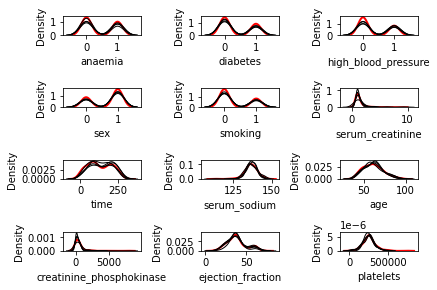

In [14]:
# Plotting
kernel.plot_imputed_distributions(wspace=0.3,hspace=0.3)
plt.tight_layout()

In [16]:
# Using KNN from fancy impute
heart_data_filled_knn = KNN(k=3).fit_transform(heart_data_tmp_amp)
heart_data_filled_knn = pd.DataFrame(heart_data_filled_knn, columns = heart_data.columns)

Imputing row 1/299 with 3 missing, elapsed time: 0.043
Imputing row 101/299 with 5 missing, elapsed time: 0.052
Imputing row 201/299 with 5 missing, elapsed time: 0.062


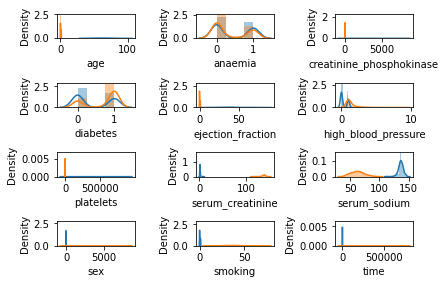

In [56]:
for i, column in enumerate(heart_data_filled_knn.columns, 1):
    if column != 'DEATH_EVENT':
        plt.subplot(4,3,i)
        sns.distplot(heart_data[column])
        sns.distplot(heart_data_filled_knn[column])
        plt.tight_layout()